# Análisis Exploratorio de Datos (EDA) - Parte 2: Visualización de Datos.

En esta segunda parte del análisis exploratorio de datos (EDA), nos vamos a enfocar en la visualización de las principales variables del dataset de entrenamiento. Esto es esencial para entender mejor las relaciones entre las características y el target (variable objetivo)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Cargamos los datos.
train_data = pd.read_csv(r'C:\Users\rodri\Desktop\Titanic 2.0\datos\train_data.csv')

---

#### Gráfico de la distribución de la variable target ('Survived')

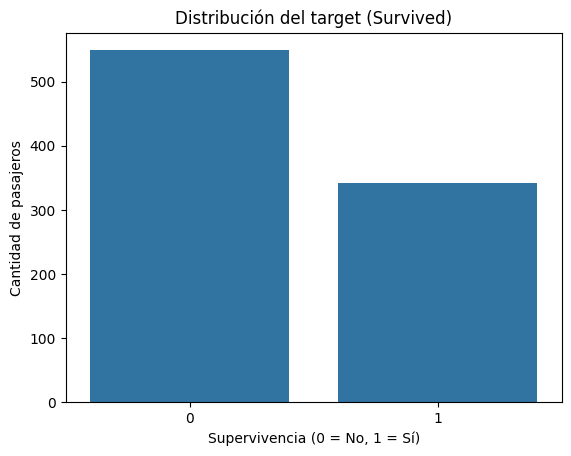

In [19]:
sns.countplot(data = train_data, x = 'Survived')
plt.title('Distribución del target (Survived)')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de pasajeros')

plt.show()

Vemos que hay más personas que no sobrevivieron (alrededor de 550) en comparación de las que sí (alrededor de 340). Esto nos dice un desequilibrio en la distribución de la variable target, esto puede influir en los modelos predictivos.

---

#### Distribución de edades (Age) por supervivencia.

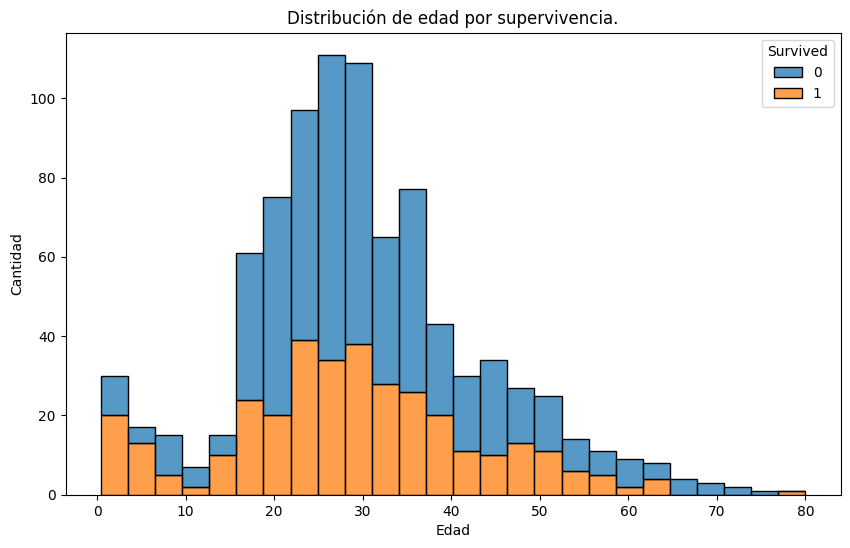

In [20]:
plt.figure(figsize = (10, 6))
sns.histplot(data = train_data, x = 'Age', hue = 'Survived', multiple = 'stack', kde = False)
plt.title('Distribución de edad por supervivencia.')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

Las personas entre 20 y 40 años representan el grupo mayoritario a bordo. Una mayor cantidad de niños y personas jóvenes sobrevivieron a comparación con las personas de mayor edad.

Hay una proporción significativa de personas de media edad y matores que no sobrevivieron. Este gráfico hace razón a la famosa frase "Mujeres y niños primero", en donde sabemos que la edad fue un factor en la probabilidad de supervivencia.

---

#### Relación entre la clase del pasajero (Pclass) y supervivencia.

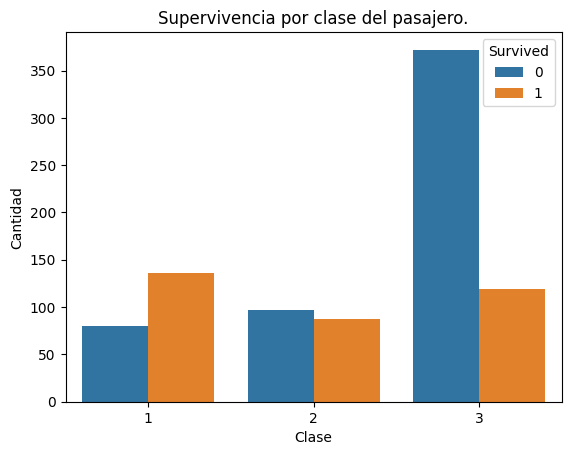

In [21]:
sns.countplot(data = train_data, x = 'Pclass', hue = 'Survived')
plt.title('Supervivencia por clase del pasajero.')
plt.xlabel('Clase')
plt.ylabel('Cantidad')

plt.show()

Los pasajeros de primera clase tienen una tasa de supervivencia más alta y los pasajeros de tercera clase tienen la mayor cantidad de no sobrevivientes.

Tal vez la clase social tuvo un impacto significativo en las probabilidades de supervivencia, tal vez por la ubicación de los camarotes y las oportunidades de acceso a los botes salvavidas. En cuanto a la cantidad de no sobreviventes de la clase 3, puede tener sentido ya que es común que hayan más personas con pasajes baratos y menos personas con pasajes exclusivos.

---

#### Supervivencia por sexo (Sex)

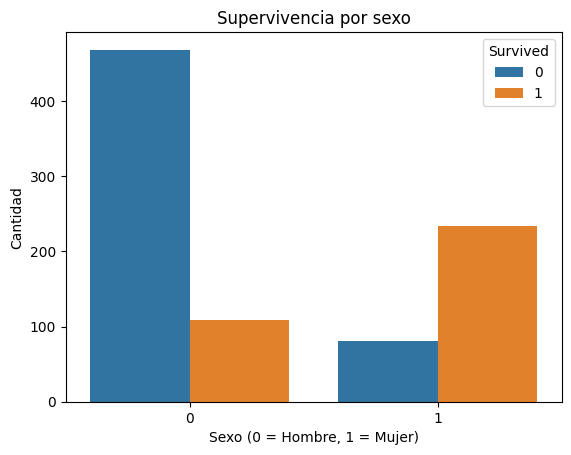

In [22]:
sns.countplot(data = train_data, x = 'Sex', hue = 'Survived')
plt.title('Supervivencia por sexo')
plt.xlabel('Sexo (0 = Hombre, 1 = Mujer)')
plt.ylabel('Cantidad')

plt.show()

Claramente hay una gran diferencia en las tasas de supervivencia entre hombres y mujeres. La mayoría de los hombres no sobrevivieron, y una proporción significativa de mujeres sí lo hizo.

En este gráfico también vemos la famosa frase: "Mujeres y niños primero". Vemos que el sexo es una característica muy importante para predecir la supervivencia.

---

#### Boxplot de Fare_log por supervivencia.

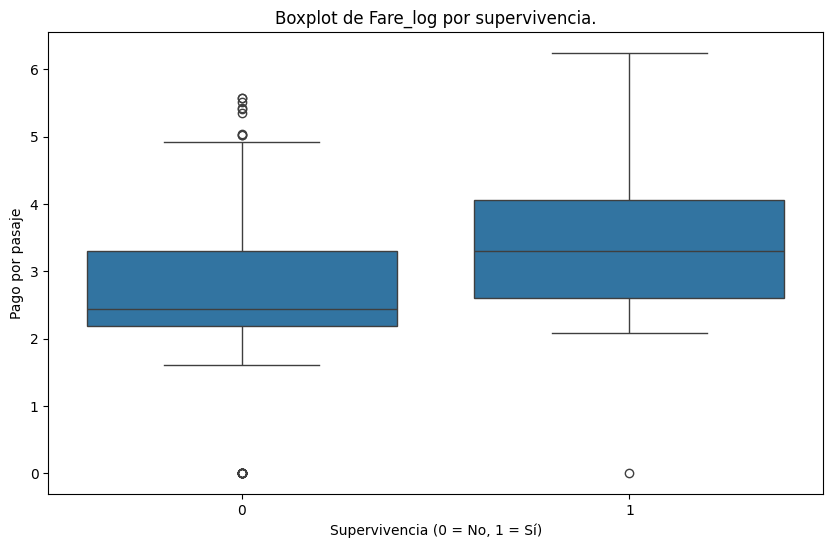

In [23]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = train_data, x = 'Survived', y = 'Fare_log')
plt.title('Boxplot de Fare_log por supervivencia.')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Pago por pasaje')

plt.show()

Vemos que los pasajeros que pagaron más tenían más probabilidades de sobrevivir.

Como lo vimos anteriormente, esto puede estar relacionado con el hecho de que los pasajeros de clases más altas tenían acceso a mejores recursos y posiblemente a botes salvavidas.

---

#### Distribución de familiares a bordo (SibSp y Parch)

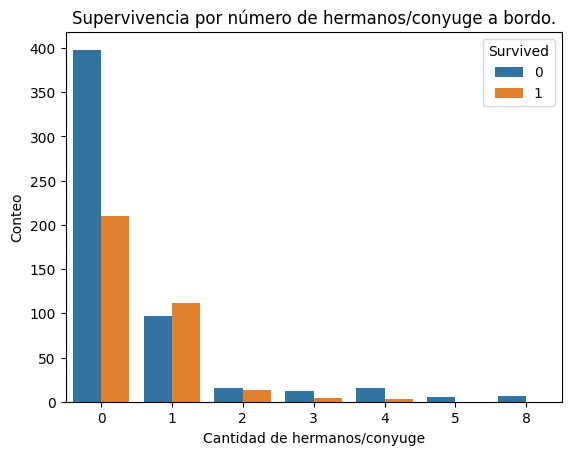

In [24]:
sns.countplot(data = train_data, x = 'SibSp', hue = 'Survived')
plt.title('Supervivencia por número de hermanos/conyuge a bordo.')
plt.xlabel('Cantidad de hermanos/conyuge')
plt.ylabel('Conteo')

plt.show()

Las personas sin hermanos/conyuge a bordo tienen una tasa de supervivencia más baja en comparación con los pasajeros que viajaban con al menos un familiar.

Aunque, a medida que el número de familiares aumenta, la tasa de supervivencia disminuye de nuevo. Sacando conclusiones, podría deberse a las dificultades logísticas de evacuar familias más grandes.

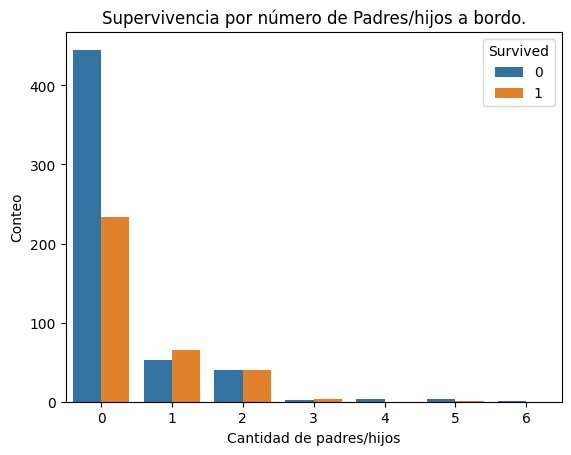

In [25]:
sns.countplot(data = train_data, x = 'Parch', hue = 'Survived')
plt.title('Supervivencia por número de Padres/hijos a bordo.')
plt.xlabel('Cantidad de padres/hijos')
plt.ylabel('Conteo')

plt.show()

La mayor cantidad de pasajeros no viajaba con padres o hijos a bordo (Cantidad de 0), en este grupo, la mayoría no sobrevivió. Vemos que, cada que aumenta la cantidad de padres/hijos, la cantidad de pasajeros disminuye. Estos grupos tienen una tasa de supervivencia más alta, aunque en grupos más grandes (3 o más) la supervivencia vuelve a disminuir.

---

#### Relación entre el puerto de embarque (Embarked) y la supervivencia.

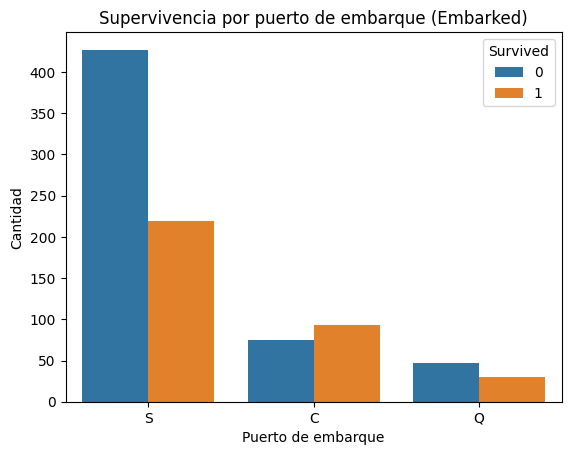

In [28]:
sns.countplot(data = train_data, x = 'Embarked', hue = 'Survived')
plt.title('Supervivencia por puerto de embarque (Embarked)')
plt.xlabel('Puerto de embarque')
plt.ylabel('Cantidad')

plt.show()

Vemos que el puerto con más pasajeros embarcados es **S** (**Southampton**), seguido por **C** (**Cherbourg**) y **Q** (**Queenstown**). Los pasajeros que embarcaron en Southampton no sobrevivieron en su mayoría, y en Cherbourg se nota una mayor proporción de supervivientes en comparación con Southampton y Queenstown.

No estoy seguro de que el puerto de embarque sea importante a la hora de predecir si un pasajero sobrevivió o no, pero tal vez, en los puertos con menos embarcados, estan las personas con más status o con boletos de mayor clase.

Para los modelos, vamos a omitir esta característica.

---

## Conclusión

Al ver estos gráficos y analizar mejor nuestros datos, vamos a usar las siguientes características para entrenar los modelos:

* **Survived** = Variable target a predecir.
* **Pclass** = Vimos que las personas con boleto de clase alta tienen más tasa de supervivencia.
* **Sex** = Vimos que el sexo es un factor importante en las probabilidades de supervivencia.
* **Age** = También vimos que la edad es un gran factor a la hora de predecir la supervivencia del pasajero.
* **SibSp** y **Parch** = Analizamos que al tener más familiares a bordo, la supervivencia es más dificil.
* **Fare_log** = Como en Pclass, sabemos que mientras más caro el boleto más probabilidades de supervivencia (sacando conclusiones).